Regresja liniowa w języku Python

Naszym zadaniem jest przewidywanie widzialności (SecchDisc) w wodzie  (y - output) na podstawie stężenia zawiesiny (SS) (x - input).

Import wymaganych bibliotek:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Import zestawu danych CSV:

In [4]:
dataset = pd.read_csv('C:/Users/53623/Desktop/WBD/ĆW 02 - Regresja liniowa/Kruk_VLagun_156.csv') 

Przyjrzyjmy się trochę danym (eksploracja), sprawdzając liczbę wierszy i kolumn w naszym zestawie danych.

In [5]:
dataset.shape

(156, 30)

Aby zobaczyć szczegóły statystyczne zbioru danych, możemy użyć describe():

In [7]:
dataset.describe()

,PSU,O2,SecchDisc,temp.,SS,chla,SRP,DOP,PP,TP,...,DOC,TPOC,PhytoBiomassC,CyanobacteriaBiomassC,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Airtemperature,Windspeedinsitu,Depth
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.356954,10.180705,0.376026,17.350000,86.937115,58.011474,15.034615,22.421154,134.547436,172.003205,...,8.206301,9.706078,2.129615,0.709808,0.592436,0.112115,0.619231,19.450000,4.985897,3.024359
std,0.758865,1.078504,0.115147,3.122251,35.506823,33.122486,11.842344,19.531893,51.210224,51.697205,...,1.025776,2.589192,0.888037,0.530066,0.309028,0.118436,0.337919,4.912624,2.621043,0.538501
min,1.400000,7.620000,0.200000,10.600000,29.000000,0.000000,0.000000,0.700000,20.900000,61.300000,...,6.457500,3.916500,0.480000,0.020000,0.100000,0.000000,0.080000,11.000000,0.000000,1.500000
25%,2.800000,9.367500,0.300000,16.200000,60.000000,32.760000,7.475000,9.000000,99.950000,133.050000,...,7.409525,8.040000,1.580000,0.240000,0.370000,0.030000,0.350000,15.950000,3.000000,2.700000
50%,3.379124,9.955000,0.350000,17.900000,80.000000,53.515000,12.250000,15.750000,131.500000,168.650000,...,8.044000,9.414100,2.085000,0.630000,0.535000,0.075000,0.610000,20.250000,5.000000,3.200000
75%,3.957258,10.890000,0.450000,20.100000,111.562500,81.910000,19.875000,30.825000,167.700000,206.800000,...,8.842500,11.387875,2.690000,1.022500,0.762500,0.150000,0.860000,22.125000,6.850000,3.400000
max,4.600000,12.890000,0.700000,20.700000,217.500000,170.370000,88.200000,91.100000,285.100000,327.600000,...,10.860000,17.420000,4.840000,2.860000,1.970000,0.760000,1.390000,33.200000,11.500000,3.900000


Wykreślmy nasze punkty danych na wykresie 2D, aby zobaczyć nasz zestaw danych i sprawdzić, czy możemy ręcznie znaleźć jakąkolwiek relację między danymi za pomocą poniższego kodu.

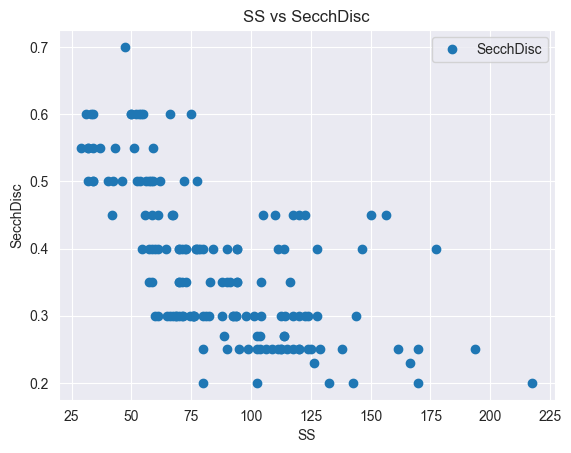

In [15]:
dataset.plot(x='SS', y='SecchDisc', style='o')
plt.title('SS vs SecchDisc')
plt.xlabel('SS')
plt.ylabel('SecchDisc')
plt.show()

Utwórzmy wykres rozkładu przewidywania widzialności i zobaczmy, gdzie możemy szukać jej średniej.

C:\Users\53623\AppData\Local\Temp\ipykernel_3396\3015017538.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['SecchDisc'])


<Axes: xlabel='SecchDisc', ylabel='Density'>

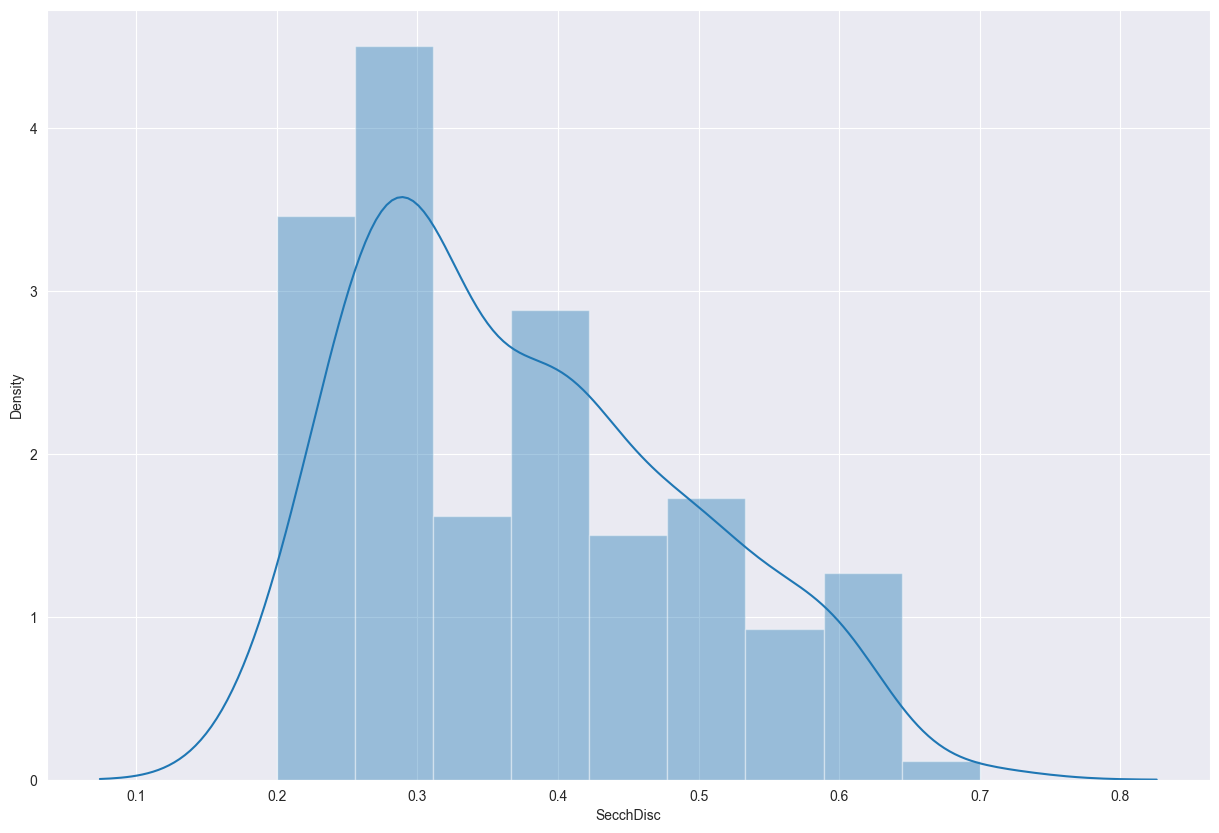

In [16]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.distplot(dataset['SecchDisc'])

Przewidywanie na podstawie regresji liniowej 

Kolejnym krokiem jest podzielenie danych na "atrybuty" i "etykiety".

Atrybuty (X) są zmiennymi niezależnymi, podczas gdy etykiety (y) są zmiennymi zależnymi, których wartości mają być przewidywane. 

In [17]:
X = dataset['SS'].values.reshape(-1, 1)
y = dataset['SecchDisc'].values.reshape(-1, 1)

Następnie dzielimy 80% danych na zestaw treningowy, a 20% danych na zestaw testowy przy użyciu poniższego kodu.

random_state jak sama nazwa wskazuje, służy do inicjowania wewnętrznego generatora liczb losowych, który zdecyduje o podziale danych na indeksy treningowe i testowe w tym przypadku. (random_state to seed)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Po podzieleniu danych na zestawy treningowe i testowe, w końcu nadszedł czas na wytrenowanie (nauczenie) naszego algorytmu. W tym celu musimy zaimportować klasę LinearRegression, utworzyć jej instancję i wywołać metodę fit() wraz z naszymi danymi treningowymi.

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Wartość przechwycenia (intercept) i nachylenia (regressor coeficient).

In [20]:
print(regressor.intercept_)
print(regressor.coef_)

[0.55338577]
[[-0.00201303]]


Przewidywanie/prognoza danych testowych/wyniku procentowego.

In [21]:
y_pred = regressor.predict(X_test)

Teraz porównaj rzeczywiste wartości wyjściowe dla X_test z przewidywanymi wartościami, wykonaj następujący skrypt:

In [22]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.50,0.397376
1,0.30,0.400979
2,0.40,0.432604
3,0.23,0.218720
4,0.70,0.457767
5,0.50,0.436630
6,0.30,0.409595
7,0.20,0.347050
8,0.30,0.420023
9,0.40,0.383708


Możemy również wizualizować wynik porównania jako wykres słupkowy.
Uwaga: Ponieważ liczba rekordów jest ogromna, dla celów reprezentacyjnych weźmiemy tylko 25 rekordów.

Chociaż nasz model nie jest zbyt precyzyjny, przewidywane wartości procentowe są zbliżone do rzeczywistych.

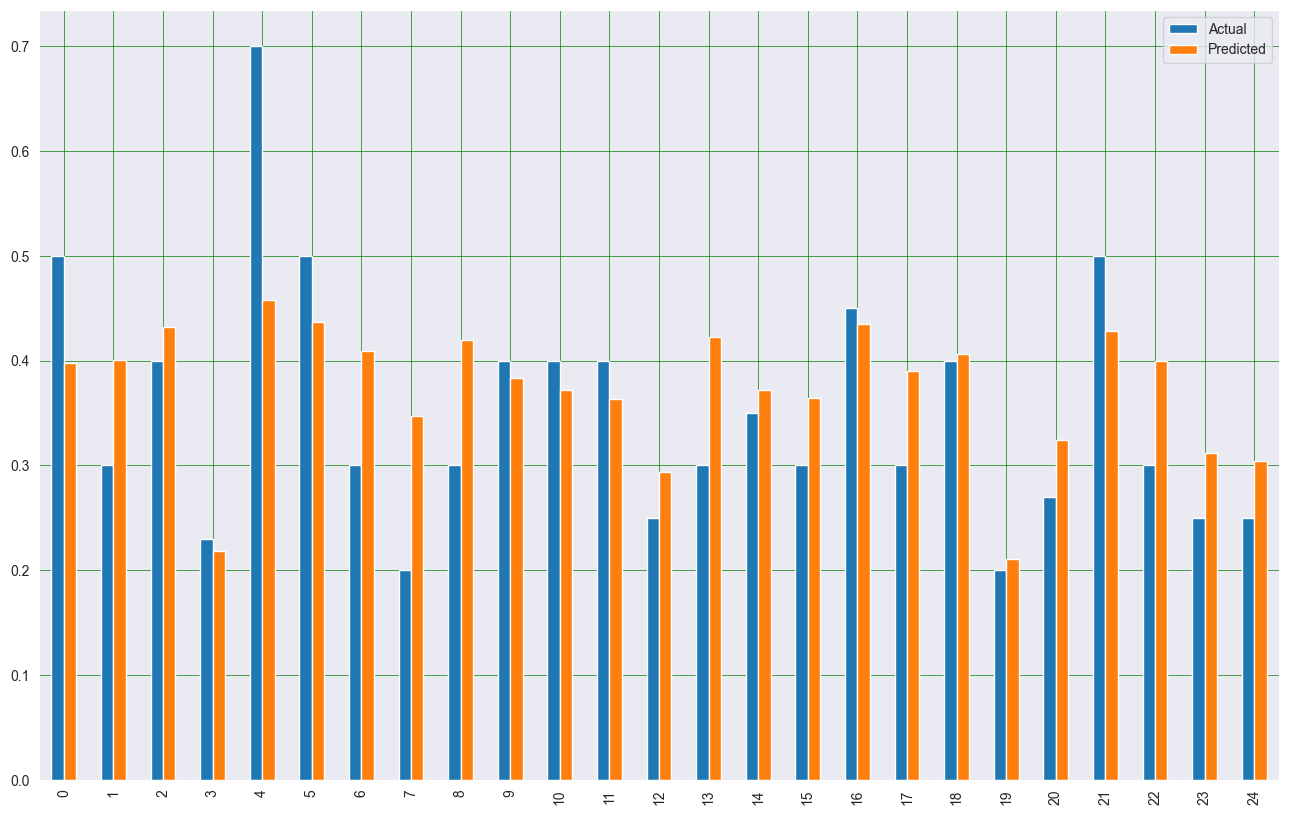

In [23]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Wykreślmy naszą linię prostą z danymi testowymi:
Linia prosta na poniższym wykresie pokazuje, że nasz algorytm jest poprawny.

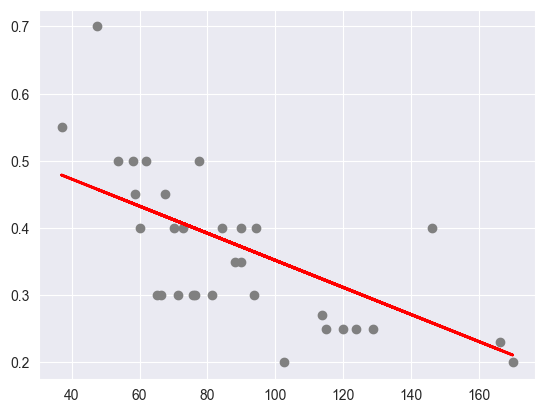

In [24]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Miary błędów modelu regresji liniowej
    
Ostatnim krokiem jest ocena wydajności algorytmu. Ten krok jest szczególnie ważny, aby porównać, jak dobrze różne algorytmy działają na określonym zestawie danych. 

W przypadku algorytmów regresji powszechnie stosuje się trzy metryki oceny:

1. Średni błąd bezwzględny (MAE) jest średnią wartości bezwzględnej błędów. Oblicza się go jako:

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.06680798903466384


2. Średni błąd kwadratowy (MSE) jest średnią błędów kwadratowych i jest obliczany jako:

In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.00702853326805623


3. Średni błąd do kwadratu (RMSE) jest pierwiastkiem kwadratowym ze średniej błędów kwadratowych:

In [27]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.08383634813167991
